<a href="https://colab.research.google.com/github/Diwash17/5CS037-Final-Portfolio-WHR-2024-/blob/main/2407736_DiwashAdhikari.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **“Analysis of the World Happiness Report: A Data-Driven Exploration of Predicting and Classifying Happiness Scores Across Populations Based on Socio-Economic and Environmental Factors, with the Categorization of Countries into High and Low Happiness Groups.”**

Importing all the modules

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR
from sklearn.feature_selection import RFE, SelectKBest, mutual_info_regression, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from IPython.display import display, Markdown


In [319]:
url = "https://raw.githubusercontent.com/Diwash17/5CS037-Final-Portfolio-WHR-2024-/main/WHR-2024.csv"
World_Happiness_Report = pd.read_csv(url)

In [320]:
World_Happiness_Report.drop('Unnamed: 0', axis=1, inplace=True)

In [321]:
World_Happiness_Report.rename(columns={'Country name':'country_name', 'Ladder score':'ladder_score',
                                       'upperwhisker':'upper_whisker','lowerwhisker':'lower_whisker','Explained by: Log GDP per capita':'log_gdp_per_capita',
                                       'Explained by: Social support':'social_support', 'Explained by: Healthy life expectancy':'healthy_life_expectancy',
                                       'Explained by: Freedom to make life choices':'freedom_to_make_life_choices',
                                       'Explained by: Generosity':'generosity','Explained by: Perceptions of corruption':'perceptions_of_corruption','Dystopia + residual':'dystopia_residual','happiness category':'happiness_category'},
                              inplace=True)


In [322]:
World_Happiness_Report.head()

,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
0,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082,High
1,Denmark,7.583,7.665,7.500,1.908,1.520,0.699,0.823,0.204,0.548,1.881,High
2,Iceland,7.525,7.618,7.433,1.881,1.617,0.718,0.819,0.258,0.182,2.050,High
3,Sweden,7.344,7.422,7.267,1.878,1.501,0.724,0.838,0.221,0.524,1.658,High
4,Israel,7.341,7.405,7.277,1.803,1.513,0.740,0.641,0.153,0.193,2.298,High


In [323]:
World_Happiness_Report.shape

(143, 12)

In [324]:
World_Happiness_Report.columns.tolist()

['country_name',
 'ladder_score',
 'upper_whisker',
 'lower_whisker',
 'log_gdp_per_capita',
 'social_support',
 'healthy_life_expectancy',
 'freedom_to_make_life_choices',
 'generosity',
 'perceptions_of_corruption',
 'dystopia_residual',
 'happiness_category']

In [325]:
World_Happiness_Report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country_name                  143 non-null    object 
 1   ladder_score                  143 non-null    float64
 2   upper_whisker                 143 non-null    float64
 3   lower_whisker                 143 non-null    float64
 4   log_gdp_per_capita            140 non-null    float64
 5   social_support                140 non-null    float64
 6   healthy_life_expectancy       140 non-null    float64
 7   freedom_to_make_life_choices  140 non-null    float64
 8   generosity                    140 non-null    float64
 9   perceptions_of_corruption     140 non-null    float64
 10  dystopia_residual             140 non-null    float64
 11  happiness_category            143 non-null    object 
dtypes: float64(10), object(2)
memory usage: 13.5+ KB


Data Cleaning

In [326]:
World_Happiness_Report.isnull().sum()

,0
country_name,0
ladder_score,0
upper_whisker,0
lower_whisker,0
log_gdp_per_capita,3
social_support,3
healthy_life_expectancy,3
freedom_to_make_life_choices,3
generosity,3
perceptions_of_corruption,3


In [327]:
numeric_columns = World_Happiness_Report.select_dtypes(include=['float64', 'int64']).columns

In [328]:
corr=World_Happiness_Report[numeric_columns].corr()
corr

,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual
ladder_score,1.000000,0.999678,0.999697,0.768504,0.813542,0.759659,0.644451,0.130038,0.451829,0.533542
upper_whisker,0.999678,1.000000,0.998750,0.761804,0.811550,0.751042,0.646309,0.129602,0.448847,0.542267
lower_whisker,0.999697,0.998750,1.000000,0.774531,0.814992,0.767506,0.642291,0.130446,0.454480,0.524816
log_gdp_per_capita,0.768504,0.761804,0.774531,1.000000,0.726843,0.830256,0.414886,-0.059405,0.444227,-0.029118
social_support,0.813542,0.811550,0.814992,0.726843,1.000000,0.706924,0.484641,0.079466,0.250870,0.159484
healthy_life_expectancy,0.759659,0.751042,0.767506,0.830256,0.706924,1.000000,0.401082,0.007148,0.399026,0.051538
freedom_to_make_life_choices,0.644451,0.646309,0.642291,0.414886,0.484641,0.401082,1.000000,0.224323,0.344197,0.250792
generosity,0.130038,0.129602,0.130446,-0.059405,0.079466,0.007148,0.224323,1.000000,0.172666,0.036423
perceptions_of_corruption,0.451829,0.448847,0.454480,0.444227,0.250870,0.399026,0.344197,0.172666,1.000000,0.000964
dystopia_residual,0.533542,0.542267,0.524816,-0.029118,0.159484,0.051538,0.250792,0.036423,0.000964,1.000000


In [329]:
knn_columns = ['log_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices'
]

In [330]:
median_columns = ['generosity', 'perceptions_of_corruption', 'dystopia_residual']

In [331]:
imputer = KNNImputer(n_neighbors=5)

In [332]:
World_Happiness_Report[knn_columns] = imputer.fit_transform(World_Happiness_Report[knn_columns])

In [333]:
World_Happiness_Report[median_columns] = World_Happiness_Report[median_columns].fillna(World_Happiness_Report[median_columns].median())

In [334]:
World_Happiness_Report.isnull().sum()

,0
country_name,0
ladder_score,0
upper_whisker,0
lower_whisker,0
log_gdp_per_capita,0
social_support,0
healthy_life_expectancy,0
freedom_to_make_life_choices,0
generosity,0
perceptions_of_corruption,0


Descriptive stastistics

In [335]:
World_Happiness_Report.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ladder_score,143.0,5.527580,1.170717,1.721,4.7260,5.7850,6.4160,7.741
upper_whisker,143.0,5.641175,1.155008,1.775,4.8455,5.8950,6.5075,7.815
lower_whisker,143.0,5.413972,1.187133,1.667,4.6060,5.6740,6.3190,7.667
log_gdp_per_capita,143.0,1.378807,0.420584,0.000,1.0790,1.4030,1.7330,2.141
social_support,143.0,1.134329,0.329777,0.000,0.9245,1.2170,1.3770,1.617
healthy_life_expectancy,143.0,0.520886,0.163171,0.000,0.4000,0.5490,0.6440,0.857
freedom_to_make_life_choices,143.0,0.620621,0.160766,0.000,0.5310,0.6320,0.7340,0.863
generosity,143.0,0.146066,0.072675,0.000,0.0925,0.1365,0.1915,0.401
perceptions_of_corruption,143.0,0.153416,0.124991,0.000,0.0690,0.1205,0.1910,0.575
dystopia_residual,143.0,1.577353,0.531842,-0.073,1.3170,1.6445,1.8795,2.998


In [336]:
World_Happiness_Report.describe(include=['object'])

,country_name,happiness_category
count,143,143
unique,143,2
top,Finland,High
freq,1,72


In [337]:
skewness = World_Happiness_Report[['ladder_score','log_gdp_per_capita', 'social_support', 'healthy_life_expectancy','freedom_to_make_life_choices',
                                   'generosity','perceptions_of_corruption','dystopia_residual']].skew()

skewness

,0
ladder_score,-0.521820
log_gdp_per_capita,-0.512415
social_support,-1.002629
healthy_life_expectancy,-0.551754
freedom_to_make_life_choices,-1.029456
generosity,0.678122
perceptions_of_corruption,1.554121
dystopia_residual,-0.615943


In [338]:
highest_happiness_score = World_Happiness_Report.loc[World_Happiness_Report['ladder_score'].idxmax(),
                                                          'country_name']
print(f'{highest_happiness_score} have highest happiness score')


Finland have highest happiness score


In [339]:
lowest_happiness_score = World_Happiness_Report.loc[World_Happiness_Report['ladder_score'].idxmin(),
                                                         'country_name']
print(f'{lowest_happiness_score} have lowest happiness score ')

Afghanistan have lowest happiness score 


In [340]:
ladder_score_range = World_Happiness_Report['ladder_score'].max() - World_Happiness_Report['ladder_score'].min()
print(f'Range of ladder score: {ladder_score_range:.3f}')

Range of ladder score: 6.020


In [341]:
ladder_score_cv = (World_Happiness_Report['ladder_score'].std()/ World_Happiness_Report['ladder_score'].mean())
print(f'Coefficient of variation of ladder score: {ladder_score_cv:.3f}')

Coefficient of variation of ladder score: 0.212


**Data Visualization**

Univariant Analysis

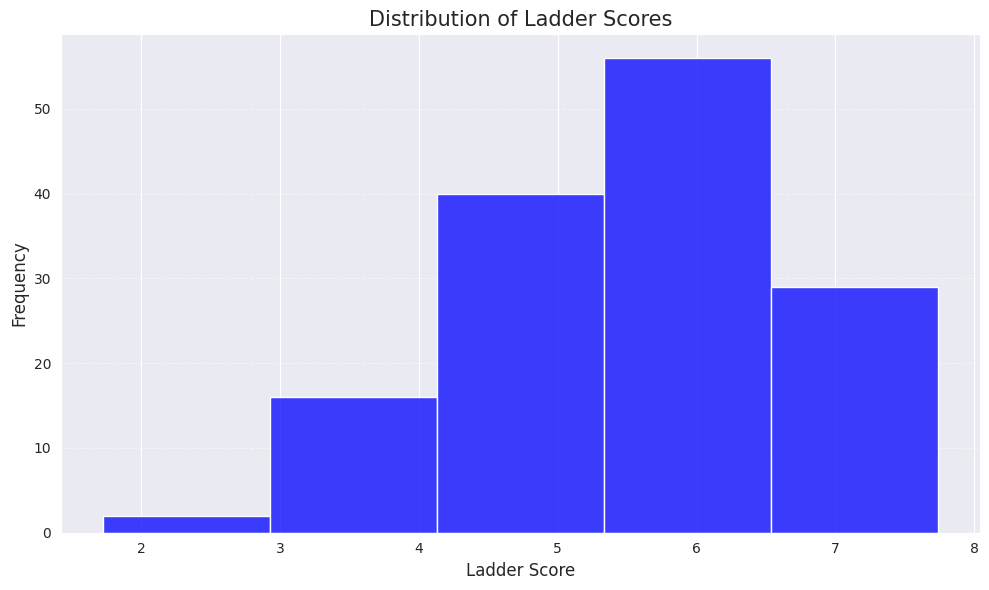

In [342]:
plt.figure(figsize=(10, 6))
sns.histplot(World_Happiness_Report["ladder_score"], bins=5, color='blue')
plt.title("Distribution of Ladder Scores", fontsize=15)
plt.xlabel("Ladder Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [343]:
happiness_counts = World_Happiness_Report['happiness_category'].value_counts()
happiness_counts

,count
happiness_category,
High,72
Low,71


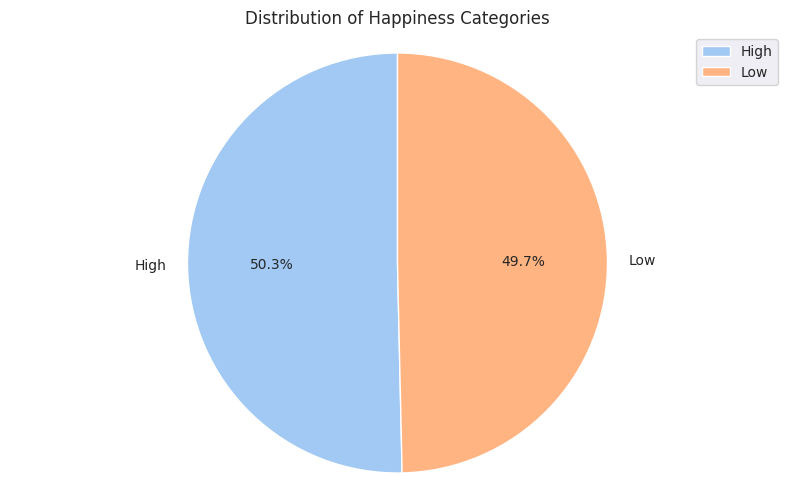

In [344]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("pastel")
plt.pie(happiness_counts, labels=happiness_counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Happiness Categories')
plt.legend()
plt.show()

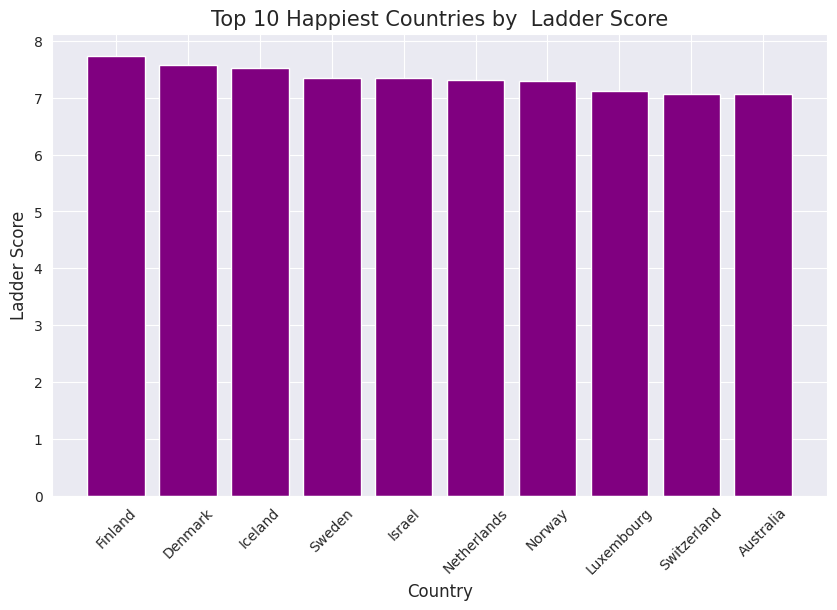

In [345]:
top_10_happiest = World_Happiness_Report.nlargest(10, 'ladder_score')
plt.figure(figsize=(10, 6))
plt.bar(top_10_happiest['country_name'], top_10_happiest['ladder_score'], color='purple')
plt.title('Top 10 Happiest Countries by  Ladder Score',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Ladder Score',fontsize=12)
plt.xticks(rotation=45)
plt.show()

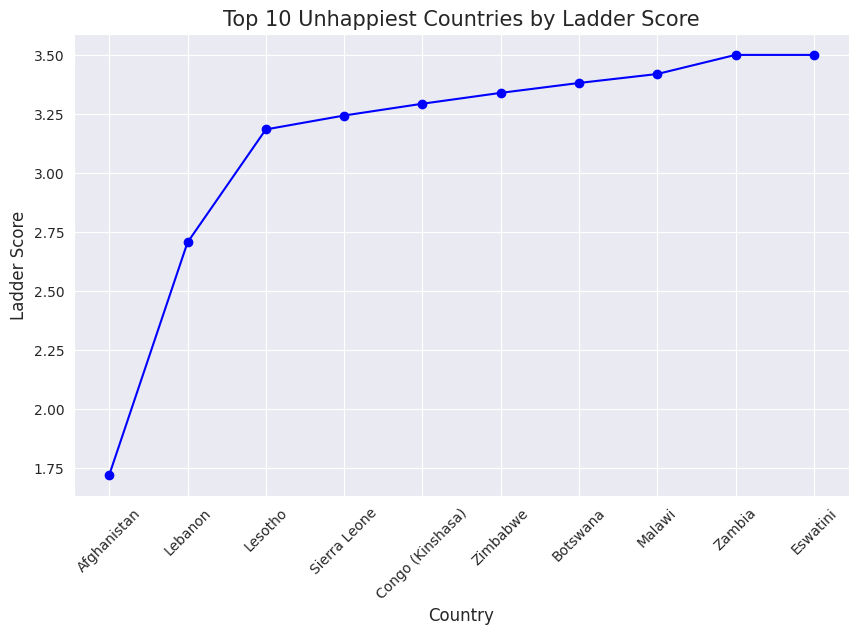

In [346]:
top_10_unhappiest = World_Happiness_Report.nsmallest(10, 'ladder_score')
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['country_name'], top_10_unhappiest['ladder_score'], marker='o', color='blue')
plt.title('Top 10 Unhappiest Countries by Ladder Score',fontsize=15)
plt.xlabel('Country',fontsize=12)
plt.ylabel('Ladder Score',fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

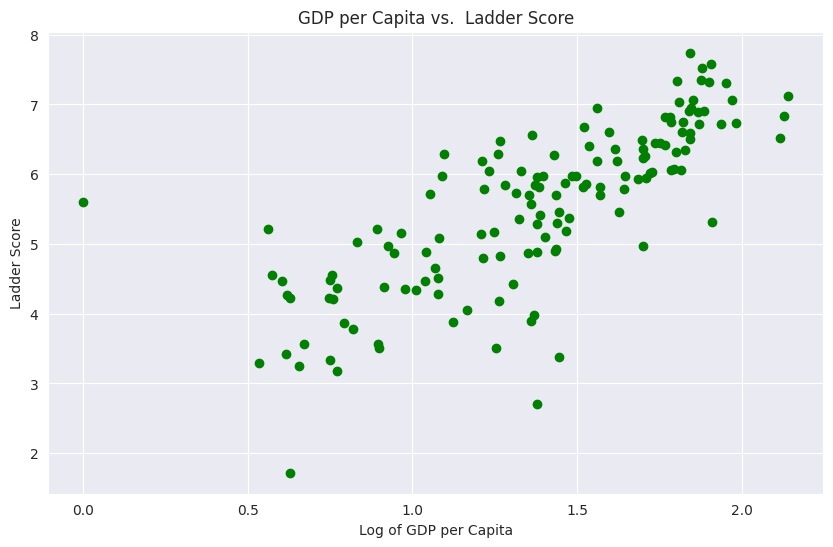

In [347]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report['log_gdp_per_capita'], World_Happiness_Report['ladder_score'], color='green')
plt.title('GDP per Capita vs.  Ladder Score')
plt.xlabel('Log of GDP per Capita')
plt.ylabel('Ladder Score')
plt.grid(True)
plt.show()

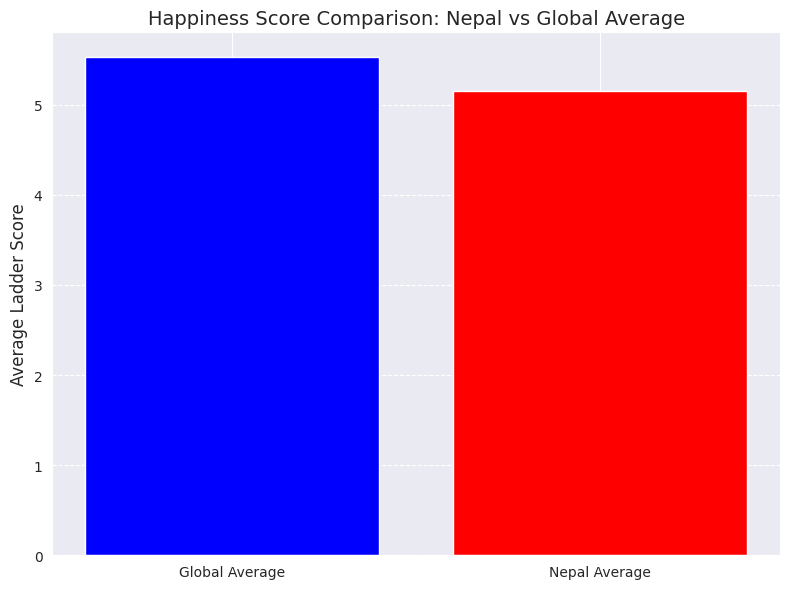

In [348]:
country = 'Nepal'
df_country = World_Happiness_Report[World_Happiness_Report['country_name'] == country]

# Calculate averages
global_avg_life_ladder = World_Happiness_Report['ladder_score'].mean()
country_avg_life_ladder = df_country['ladder_score'].mean()

# Create bar plot for comparison
plt.figure(figsize=(8, 6))
plt.bar(['Global Average', f'{country} Average'], [global_avg_life_ladder, country_avg_life_ladder], color=['blue', 'red'])

# Add title and labels
plt.title(f'Happiness Score Comparison: {country} vs Global Average', fontsize=14)
plt.ylabel('Average Ladder Score', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

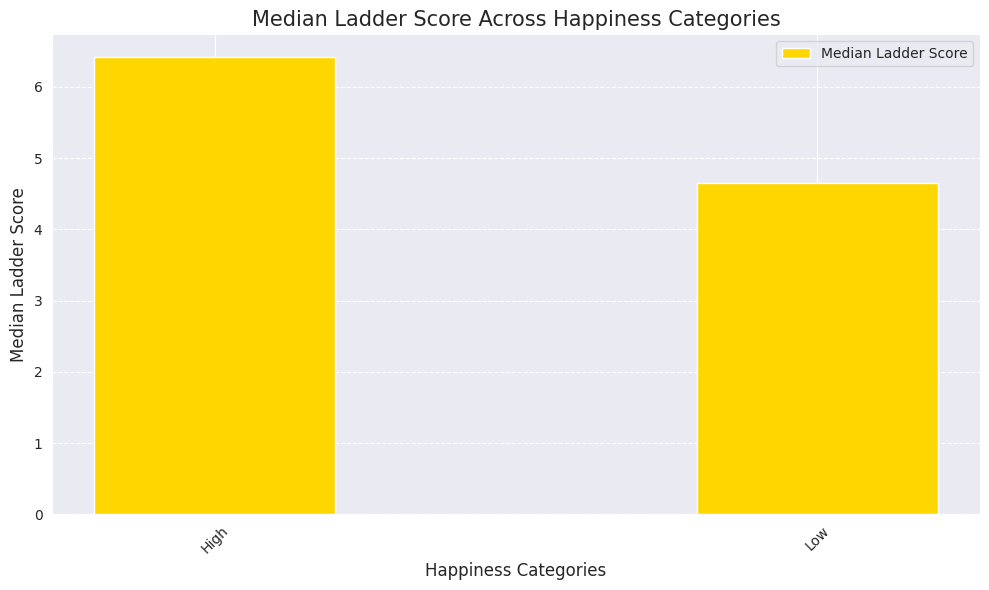

In [349]:
# Example: Median ladder scores for Happiness Categories
categories = World_Happiness_Report['happiness_category'].unique()
medians = World_Happiness_Report.groupby('happiness_category')['ladder_score'].median()

x = np.arange(len(categories))  # Number of categories
width = 0.4  # Width of each bar

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x, medians, width, color="gold", label="Median Ladder Score")

# Adding details
plt.title("Median Ladder Score Across Happiness Categories", fontsize=15)
plt.xlabel("Happiness Categories", fontsize=12)
plt.ylabel("Median Ladder Score", fontsize=12)
plt.xticks(x, categories, fontsize=10, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Outlier detection

In [350]:
ladder_score_q1 = World_Happiness_Report['ladder_score'].quantile(0.25)
ladder_score_q3 = World_Happiness_Report['ladder_score'].quantile(0.75)
ladder_score_iqr = ladder_score_q3 - ladder_score_q1

In [351]:
ladder_score_lower_bound = ladder_score_q1 - 1.5*ladder_score_iqr
ladder_score_lower_bound

2.1909999999999994

In [352]:
ladder_score_upper_bound = ladder_score_q3 + 1.5*ladder_score_iqr
ladder_score_upper_bound

8.951

In [353]:
gdp_q1 = World_Happiness_Report['log_gdp_per_capita'].quantile(0.25)
gdp_q3 = World_Happiness_Report['log_gdp_per_capita'].quantile(0.75)
gdp_iqr = gdp_q3 - gdp_q1

In [354]:
gdp_lower_bound = gdp_q1 - 1.5 * gdp_iqr
gdp_lower_bound

0.09800000000000031

In [355]:
gdp_upper_bound = gdp_q3 + 1.5 * gdp_iqr
gdp_upper_bound

2.714

In [356]:
social_support_q1= World_Happiness_Report['social_support'].quantile(0.25)
social_support_q3 = World_Happiness_Report['social_support'].quantile(0.75)
social_support_iqr = social_support_q3 - social_support_q1

In [357]:
social_support_lower_bound = social_support_q1 - 1.5 * social_support_iqr
social_support_lower_bound

0.24575000000000025

In [358]:
social_support_upper_bound = social_support_q3 + 1.5 * social_support_iqr
social_support_upper_bound

2.0557499999999997

In [359]:
outliers_ladder_gdp = World_Happiness_Report[
    (World_Happiness_Report["ladder_score"] < ladder_score_lower_bound) |
    (World_Happiness_Report["ladder_score"] > ladder_score_upper_bound) |
    (World_Happiness_Report["log_gdp_per_capita"] < gdp_lower_bound) |
    (World_Happiness_Report["log_gdp_per_capita"] > gdp_upper_bound)
]

# Print the number of outliers detected for ladder_score & log_gdp_per_capita
print(f"Number of outliers based on ladder_score & log_gdp_per_capita: {len(outliers_ladder_gdp)}")
outliers_ladder_gdp

Number of outliers based on ladder_score & log_gdp_per_capita: 2


,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
78,Venezuela,5.607,5.725,5.489,0.000,1.321,0.491,0.518,0.192,0.086,2.998,Low
142,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


In [360]:
outliers_ladder_social = World_Happiness_Report[
    (World_Happiness_Report["ladder_score"] < ladder_score_lower_bound) |
    (World_Happiness_Report["ladder_score"] > ladder_score_upper_bound) |
    (World_Happiness_Report["social_support"] < social_support_lower_bound) |
    (World_Happiness_Report["social_support"] > social_support_upper_bound)
]

# Print the number of outliers detected for ladder_score & social_support
print(f"Number of outliers based on ladder_score & social_support: {len(outliers_ladder_social)}")
outliers_ladder_social

Number of outliers based on ladder_score & social_support: 2


,country_name,ladder_score,upper_whisker,lower_whisker,log_gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,dystopia_residual,happiness_category
115,Benin,4.377,4.510,4.245,0.914,0.128,0.284,0.567,0.112,0.252,2.121,Low
142,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672,Low


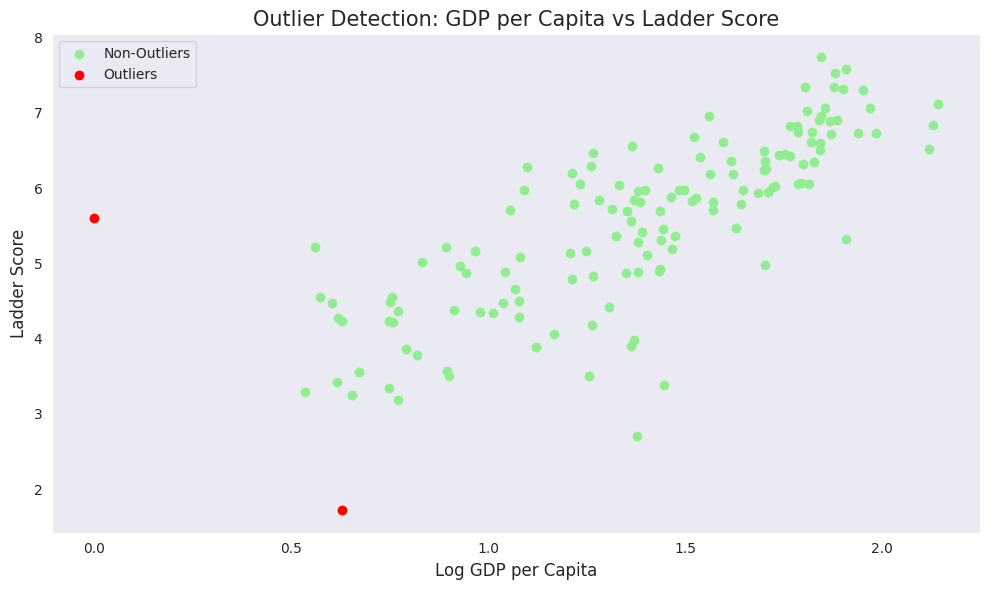

In [361]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report["log_gdp_per_capita"], World_Happiness_Report["ladder_score"], color="lightgreen", label="Non-Outliers")
plt.scatter(outliers_ladder_gdp["log_gdp_per_capita"], outliers_ladder_gdp["ladder_score"], color="red", label="Outliers")
plt.title("Outlier Detection: GDP per Capita vs Ladder Score", fontsize=15)
plt.xlabel("Log GDP per Capita", fontsize=12)
plt.ylabel("Ladder Score", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

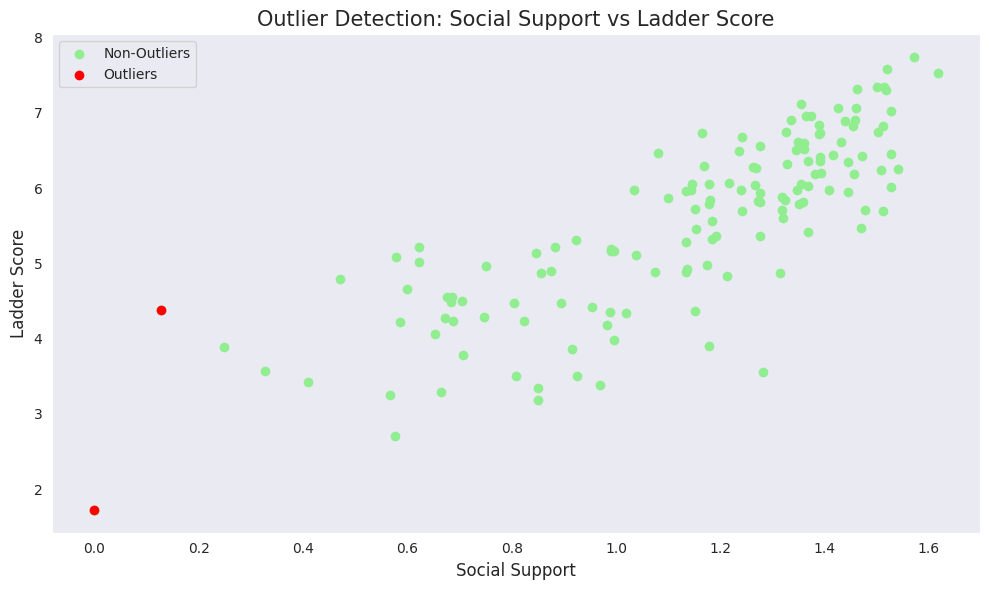

In [362]:
plt.figure(figsize=(10, 6))
plt.scatter(World_Happiness_Report["social_support"], World_Happiness_Report["ladder_score"], color="lightgreen", label="Non-Outliers")
plt.scatter(outliers_ladder_social["social_support"], outliers_ladder_social["ladder_score"], color="red", label="Outliers")
plt.title("Outlier Detection: Social Support vs Ladder Score", fontsize=15)
plt.xlabel("Social Support", fontsize=12)
plt.ylabel("Ladder Score", fontsize=12)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

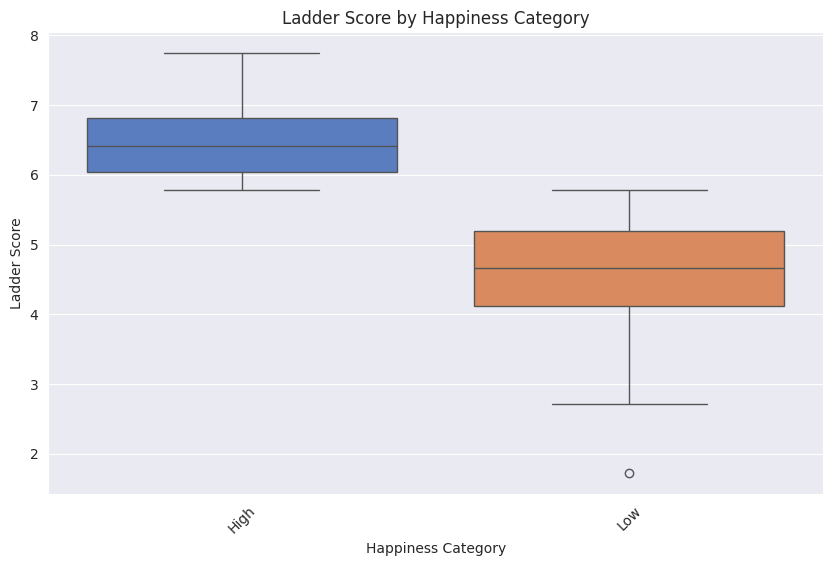

In [363]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='happiness_category', y='ladder_score', data=World_Happiness_Report, palette='muted')
plt.title('Ladder Score by Happiness Category')
plt.xlabel('Happiness Category')
plt.ylabel('Ladder Score')
plt.xticks(rotation=45)
plt.show()

In [364]:

# Initialize the RobustScaler
scaler = RobustScaler()

# Apply scaling to the selected columns
World_Happiness_Report[["ladder_score", "log_gdp_per_capita", "social_support"]] = scaler.fit_transform(
    World_Happiness_Report[["ladder_score", "log_gdp_per_capita", "social_support"]]
)

Multivariant Analysis

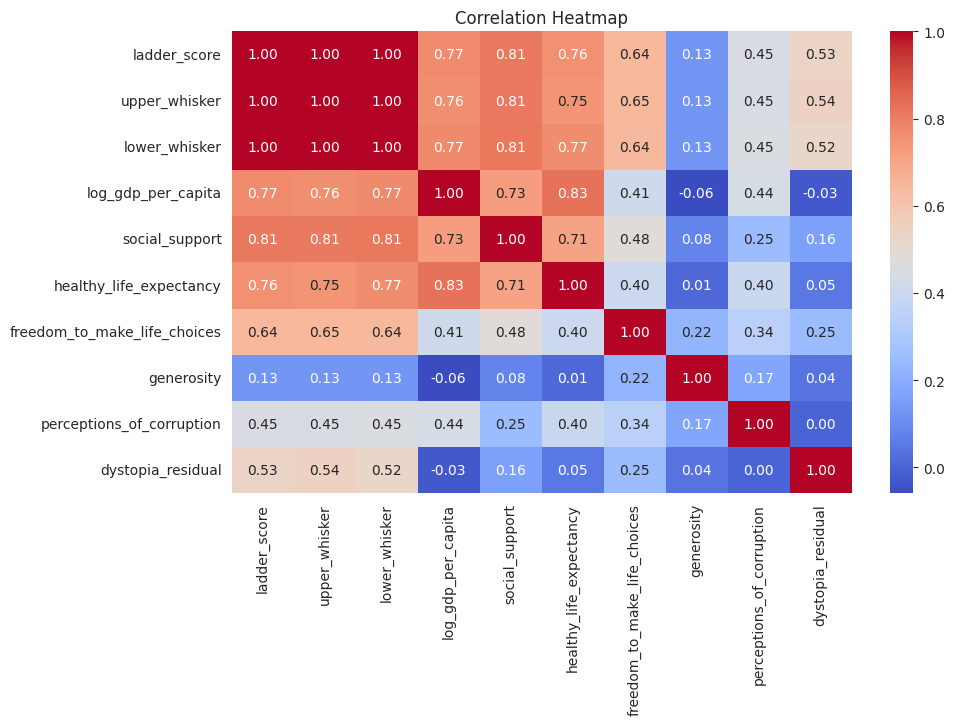

In [365]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

**Data Transformation**

In [366]:
numeric_columns = ['ladder_score','log_gdp_per_capita','social_support','healthy_life_expectancy','freedom_to_make_life_choices',
                  'generosity','perceptions_of_corruption','dystopia_residual']

In [367]:
for col in numeric_columns:
        World_Happiness_Report[col] = (World_Happiness_Report[col] - World_Happiness_Report[col].mean()) / World_Happiness_Report[col].std()

In [368]:
World_Happiness_Report['binary_happiness'] = World_Happiness_Report['happiness_category'].apply(lambda x: 1 if x == 'High' else 0)

In [369]:
World_Happiness_Report.drop(['upper_whisker','lower_whisker','country_name', 'happiness_category'],axis=1,inplace=True)

In [370]:
print(World_Happiness_Report.columns)

Index(['ladder_score', 'log_gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'dystopia_residual', 'binary_happiness'],
      dtype='object')


**Classification**

In [371]:
X = World_Happiness_Report.drop('binary_happiness', axis=1)
y = World_Happiness_Report['binary_happiness']

Train Test Split

In [372]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(f'The shape of X_train{X_train.shape}')
print(f'The shape of X_test{X_test.shape}')
print(f'The shape of y_train{y_train.shape}')
print(f'The shape of y_test{y_test.shape}')

The shape of X_train(114, 8)
The shape of X_test(29, 8)
The shape of y_train(114,)
The shape of y_test(29,)


Build a Model from Scratch

Logistic Regression using Sigmoid Function(for Binary Classification)

In [373]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [374]:
def test_logistic_function():
    """
    Test cases for the sigmoid function.
    """

    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3)  # Expected output: 0.5
    assert round(sigmoid(x_scalar), 3) == expected_output_scalar, f"Test failed for scalar input: {sigmoid(x_scalar)}"

    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3)  # Expected output: ~0.881
    assert round(sigmoid(x_pos), 3) == expected_output_pos, f"Test failed for positive scalar input: {sigmoid(x_pos)}"

    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3)  # Expected output: ~0.047
    assert round(sigmoid(x_neg), 3) == expected_output_neg, f"Test failed for negative scalar input: {sigmoid(x_neg)}"

    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047])  # Adjusted expected values rounded to 3 decimals
    # Use np.round to round the array element-wise and compare
    assert np.all(np.round(sigmoid(x_array), 3) == expected_output_array), f"Test failed for numpy array input: {sigmoid(x_array)}"

    print("All tests passed!")

# Run the test case
test_logistic_function()

All tests passed!


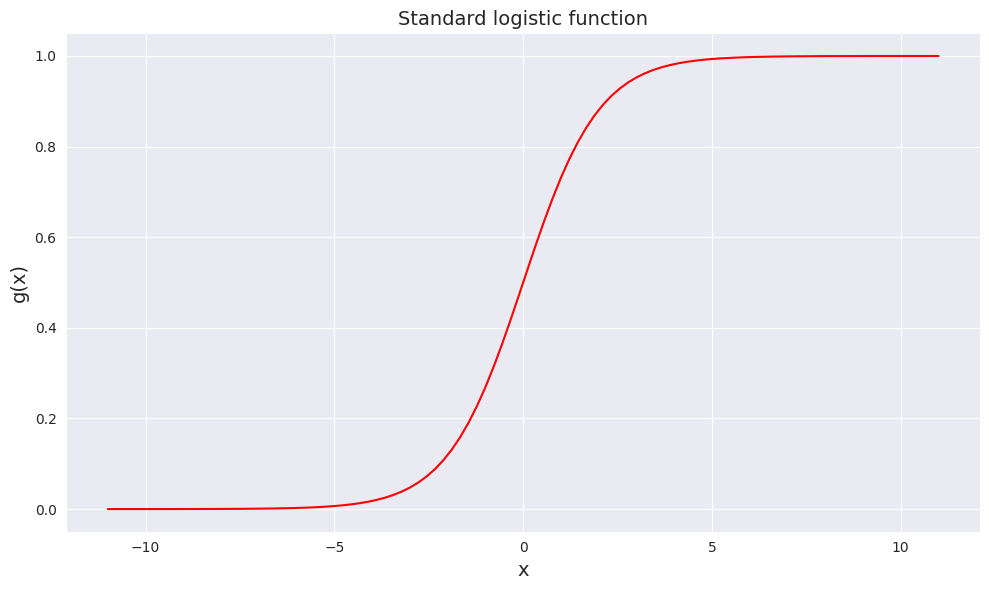

In [375]:
plt.figure(figsize = (10, 6))
x = np.linspace(-11, 11, 100)
plt.plot(x, sigmoid(x), color = 'red')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

In [376]:
# Loss Function
def calculate_loss(X, y, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    # Binary cross-entropy loss
    loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
    return loss

In [377]:
# Gradient Descent
def gradient_descent(X, y, y_pred):
    n_samples = len(y)
    dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
    db = (1 / n_samples) * np.sum(y_pred - y)
    return dw, db

In [378]:
def logistic_regression(X, y, lr=0.01, epochs=1000):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    # List to store the loss at each epoch
    loss_history = []

    # Gradient Descent Loop
    for epoch in range(epochs):
        # Compute predictions
        predictions = sigmoid(np.dot(X, weights) + bias)

        # Calculate gradients
        dw, db = gradient_descent(X, y, predictions)

        # Update weights and bias
        weights -= lr * dw
        bias -= lr * db

        # Calculate and store the loss
        loss = calculate_loss(X, y, weights, bias)
        loss_history.append(loss)

        # Optionally print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return weights, bias, loss_history

In [379]:
# Prediction Function
def predict(X, weights, bias):
    linear_model = np.dot(X, weights) + bias
    y_pred = sigmoid(linear_model)
    return np.array([1 if i > 0.5 else 0 for i in y_pred])

In [380]:
def evaluate(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1_score
    }

In [381]:
weights, bias, loss_history = logistic_regression(X_train, y_train, lr=0.01, epochs=1000)

Epoch 0: Loss = 0.6865
Epoch 100: Loss = 0.3852
Epoch 200: Loss = 0.3020
Epoch 300: Loss = 0.2618
Epoch 400: Loss = 0.2373
Epoch 500: Loss = 0.2203
Epoch 600: Loss = 0.2076
Epoch 700: Loss = 0.1975
Epoch 800: Loss = 0.1892
Epoch 900: Loss = 0.1822


In [382]:
# Make Predictions
y_train_pred = predict(X_train, weights, bias)
y_test_pred = predict(X_test, weights, bias)

In [383]:
# Evaluate the Model
train_metrics = evaluate(y_train, y_train_pred)
test_metrics = evaluate(y_test, y_test_pred)

In [384]:
# Calculate Loss
train_loss = calculate_loss(X_train, y_train, weights, bias)
test_loss = calculate_loss(X_test, y_test, weights, bias)

In [385]:
# Print Metrics
print("Train Metrics:")
for metric, value in train_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Train Loss: {train_loss:.4f}")

Train Metrics:
Accuracy: 0.9386
Precision: 0.8889
Recall: 1.0000
F1 Score: 0.9412
Train Loss: 0.1763


In [386]:
print("\nTest Metrics:")
for metric, value in test_metrics.items():
    print(f"{metric}: {value:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Metrics:
Accuracy: 0.9655
Precision: 0.9412
Recall: 1.0000
F1 Score: 0.9697
Test Loss: 0.1776


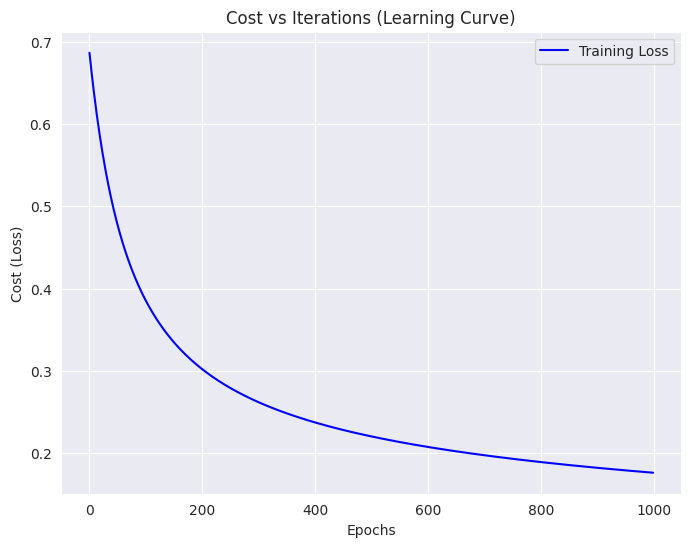

In [387]:
# Plot the Loss vs Epochs (Learning Curve)
plt.figure(figsize=(8, 6))
plt.plot(loss_history, label="Training Loss", color='blue')
plt.title('Cost vs Iterations (Learning Curve)')
plt.xlabel('Epochs')
plt.ylabel('Cost (Loss)')
plt.legend()
plt.grid(True)
plt.show()


In [388]:
def plot_confusion_matrix(y_true, y_pred):
    """
    Plots the confusion matrix using Seaborn heatmap with custom labels.

    Args:
        y_true (np.array): True labels (0 for Low, 1 for High).
        y_pred (np.array): Predicted labels (0 for Low, 1 for High).
    """
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    class_labels = ["Low", "High"]  # Mapping: 0 -> Low, 1 -> High

    # Create a heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

### Confusion Matrix for Training Set:

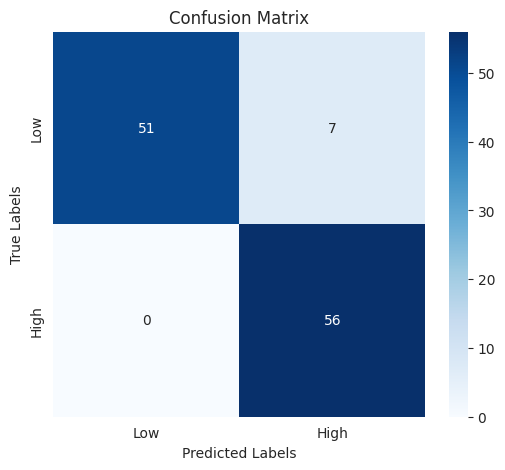

In [389]:
display(Markdown("### Confusion Matrix for Training Set:"))
plot_confusion_matrix(y_train, y_train_pred)

### Confusion Matrix for Test Set:

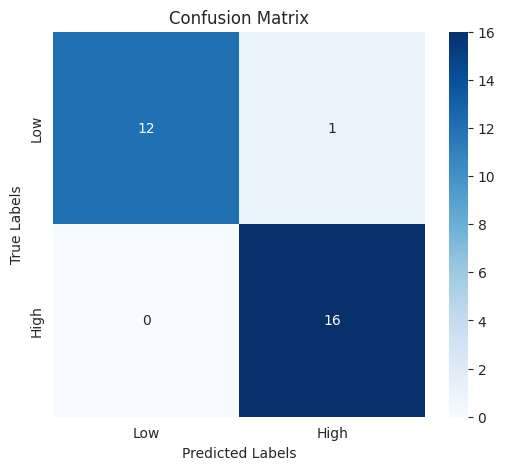

In [390]:
display(Markdown("### Confusion Matrix for Test Set:"))
plot_confusion_matrix(y_test, y_test_pred)

Primary model

Model -1

In [391]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
class_report_train = classification_report(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
class_report_test = classification_report(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Classification Report on training set:\n{class_report_train}')
print(f'Accuracy on test set: {acc_test}')
print(f'Classification Report on test set:\n{class_report_test}')
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix on training set:\n{cm_train}')
print(f'Confusion Matrix on test set:\n{cm_test}')


Accuracy on training set: 0.9649122807017544
Classification Report on training set:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.95      0.98      0.96        56

    accuracy                           0.96       114
   macro avg       0.97      0.97      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy on test set: 0.9655172413793104
Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Confusion Matrix on training set:
[[55  3]
 [ 1 55]]
Confusion Matrix on test set:
[[12  1]
 [ 0 16]]


Model2

In [392]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
report_class = classification_report(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
report_class_test = classification_report(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Classification Report on training set:\n{report_class}')
print(f'Accuracy on test set: {acc_test}')
print(f'Classification Report on test set:\n{report_class_test}')
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)
print(f'Confusion Matrix on training set:\n{cm_train}')
print(f'Confusion Matrix on test set:\n{cm_test}')


Accuracy on training set: 0.9473684210526315
Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        58
           1       0.90      1.00      0.95        56

    accuracy                           0.95       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114

Accuracy on test set: 0.9655172413793104
Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29

Confusion Matrix on training set:
[[52  6]
 [ 0 56]]
Confusion Matrix on test set:
[[12  1]
 [ 0 16]]


Hyperparameter tunning

Model 1

In [393]:
# Define hyperparameters for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength; smaller values = stronger regularization
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Type of regularization
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithm to optimize logistic regression
    'max_iter': [100, 300, 500, 1000]  # Maximum number of iterations for solver convergence
}

# Perform GridSearchCV
# Assuming 'lr' is a defined LogisticRegression object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters & score
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}


Model-2

In [394]:
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],  # number of neighbors
    'weights': ['uniform', 'distance'],   # weights  'uniform' gives equal weight to all neighbors, 'distance' gives more weight to closer neighbors.
    'metric': ['euclidean', 'manhattan', 'minkowski']  #  metric Different distance metrics
}
# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


Feature Selection

Model-1

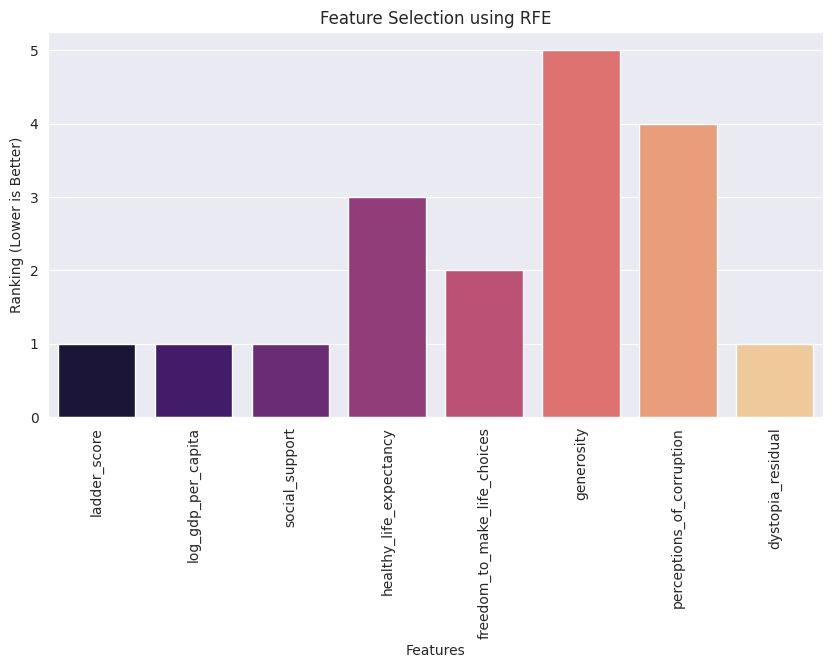

In [395]:
# Initialize base model for RFE (Linear Regression)
rfe_model = LogisticRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="magma")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()



In [396]:
ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': feature_ranking,
    'Selected': rfe.support_
})

# Sort the DataFrame by ranking
ranking_df = ranking_df.sort_values(by='Ranking')
ranking_df

,Feature,Ranking,Selected
0,ladder_score,1,True
1,log_gdp_per_capita,1,True
2,social_support,1,True
7,dystopia_residual,1,True
4,freedom_to_make_life_choices,2,False
3,healthy_life_expectancy,3,False
6,perceptions_of_corruption,4,False
5,generosity,5,False


In [397]:
selected_features

Index(['ladder_score', 'log_gdp_per_capita', 'social_support',
       'dystopia_residual'],
      dtype='object')

Model-2

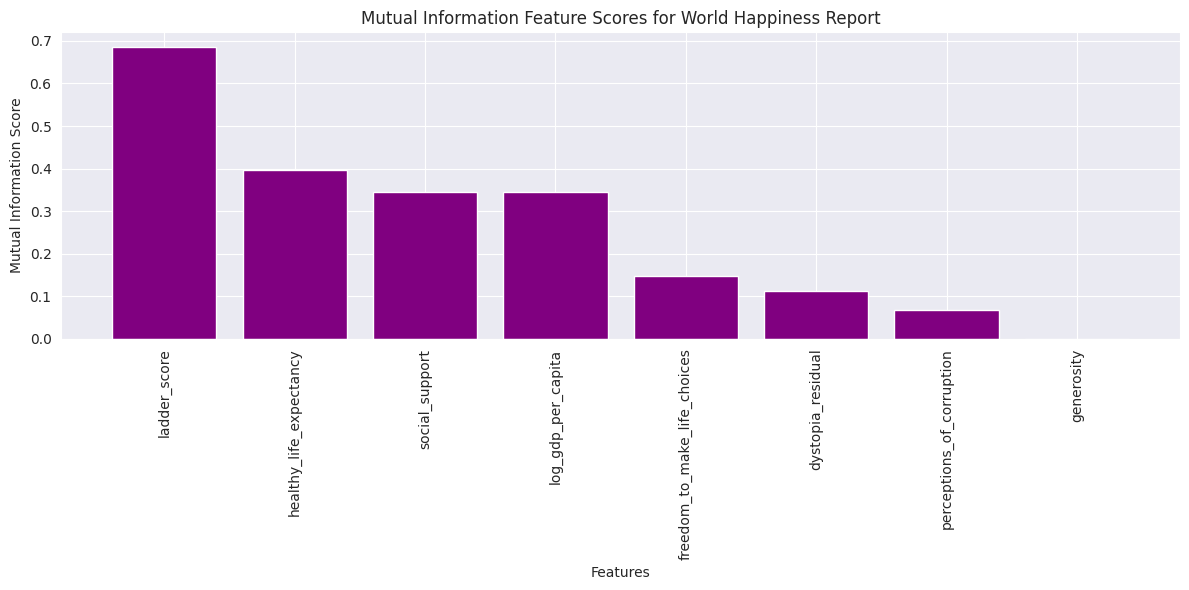

In [398]:
k_best = SelectKBest(score_func=mutual_info_classif, k=4)
k_best.fit(X, y)
selected_feature_indices = np.where(k_best.get_support())[0]
feature_names = World_Happiness_Report.columns
feature_scores = k_best.scores_
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_scores)), sorted_feature_scores, tick_label=sorted_feature_names,color='purple')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.title('Mutual Information Feature Scores for World Happiness Report')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [399]:
# Create a dataframe to store feature names and their mutual information scores
feature_df = pd.DataFrame({'Feature': sorted_feature_names, 'Mutual Information Score': sorted_feature_scores}) # Using sorted_feature_names & sorted_feature_scores instead

# Sort the dataframe by mutual information score in descending order
feature_df = feature_df.sort_values(by='Mutual Information Score', ascending=False)

# Print the dataframe with sorted feature scores
display(Markdown("## Mutual Information feature score:"))
feature_df


## Mutual Information feature score:

,Feature,Mutual Information Score
0,ladder_score,0.685784
1,healthy_life_expectancy,0.397362
2,social_support,0.346052
3,log_gdp_per_capita,0.345816
4,freedom_to_make_life_choices,0.148419
5,dystopia_residual,0.112015
6,perceptions_of_corruption,0.068570
7,generosity,0.000000


In [400]:
 #Display the top 4 most important features
top_4_features = feature_df.head(4)
display(Markdown("## Top 4 Most Important Features:"))
top_4_features

## Top 4 Most Important Features:

,Feature,Mutual Information Score
0,ladder_score,0.685784
1,healthy_life_expectancy,0.397362
2,social_support,0.346052
3,log_gdp_per_capita,0.345816


Not sensitive to outliers

My four choice of feature are

ladder_score

healthy_life_expectancy

social_support

log_gdp_per_capita



Final model

My both primary model (KNN classifier  and Logistic Regression) have similar accuracy and other evaluation metrics. In final model i decide to choose Logistic due to  simple interparbility while knn is also simple but it is Computationally Expensive and Memory Inefficiency

In [401]:
X = World_Happiness_Report[['ladder_score','log_gdp_per_capita','social_support','dystopia_residual']]
y = World_Happiness_Report['binary_happiness']
final_model = LogisticRegression(C=1, penalty= 'l1', solver= 'saga', max_iter=300)
final_model.fit(X_train,y_train)
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy on training set: {acc_train}')
print(f'Accuracy on test set: {acc_test}')
class_report_train = classification_report(y_train, y_pred_train)
class_report_test = classification_report(y_test, y_pred_test)
print(f'Classification Report on training set:\n{class_report_train}')
print(f'Classification Report on test set:\n{class_report_test}')

Accuracy on training set: 0.9824561403508771
Accuracy on test set: 0.9655172413793104
Classification Report on training set:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        58
           1       0.97      1.00      0.98        56

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Classification Report on test set:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.94      1.00      0.97        16

    accuracy                           0.97        29
   macro avg       0.97      0.96      0.96        29
weighted avg       0.97      0.97      0.97        29



Conclusion

Regression

In [402]:
X = World_Happiness_Report.drop(['ladder_score','binary_happiness'],axis=1)
y = World_Happiness_Report['ladder_score']

Build a model from scratch

Linear Regression(Multiple regression)

In [403]:
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.

    Parameters:
    X (ndarray): Feature matrix with bias term.
    y (ndarray): Target values.
    theta (ndarray): Model coefficients.

    Returns:
    float: Cost function value.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

In [404]:
def gradient_descent(X, y, theta, learning_rate, epochs):
    """
    Perform gradient descent to minimize the cost function.

    Parameters:
    X (ndarray): Feature matrix with bias term.
    y (ndarray): Target values.
    theta (ndarray): Initial model coefficients.
    learning_rate (float): Learning rate for optimization.
    epochs (int): Number of iterations.

    Returns:
    tuple: Optimized theta values, cost history.
    """
    m = len(y)
    cost_history = []

    for _ in range(epochs):
        y_pred = np.dot(X, theta)
        error = y_pred - y
        gradient = (1/m) * np.dot(X.T, error)
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [405]:
def linear_regression(X, y, learning_rate=0.1, epochs=1000):
    """
    Train a multiple linear regression model using gradient descent.

    Parameters:
    X (ndarray): Feature matrix.
    y (ndarray): Target values.
    learning_rate (float, optional): Learning rate. Default is 0.01.
    epochs (int, optional): Number of iterations. Default is 1000.

    Returns:
    tuple: Optimized theta values, cost history.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term (intercept)
    theta = np.zeros(X.shape[1])  # Initialize weights
    return gradient_descent(X, y, theta, learning_rate, epochs)


In [406]:
def predict(X, theta):
    """
    Make predictions using the trained linear regression model.

    Parameters:
    X (ndarray): Feature matrix.
    theta (ndarray): Model coefficients.

    Returns:
    ndarray: Predicted values.
    """
    X = np.c_[np.ones(X.shape[0]), X]  # Adding bias term
    return np.dot(X, theta)

In [407]:
def mean_squared_error(y, y_pred):
    return np.mean((y - y_pred) ** 2)

def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def r2_score(y, y_pred):
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    """
    Compute RMSE, MAE, MSE, and R² score for regression evaluation on both train and test sets.

    Parameters:
    y_train (ndarray): Actual target values for training set
    y_train_pred (ndarray): Predicted target values for training set
    y_test (ndarray): Actual target values for test set
    y_test_pred (ndarray): Predicted target values for test set

    Returns:
    RMSE, MAE, MSE, and R² score for both train and test sets
    """
    metrics = {}

    # Train set evaluation
    metrics["Train RMSE"] = "{:.4f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    metrics["Train MAE"] = "{:.4f}".format(mean_absolute_error(y_train, y_train_pred))
    metrics["Train MSE"] = "{:.4f}".format(mean_squared_error(y_train, y_train_pred))
    metrics["Train R² Score"] = "{:.4f}".format(r2_score(y_train, y_train_pred))

    # Test set evaluation
    metrics["Test RMSE"] = "{:.4f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    metrics["Test MAE"] = "{:.4f}".format(mean_absolute_error(y_test, y_test_pred))
    metrics["Test MSE"] = "{:.4f}".format(mean_squared_error(y_test, y_test_pred))
    metrics["Test R² Score"] = "{:.4f}".format(r2_score(y_test, y_test_pred))

    return metrics

In [408]:
metrics = evaluate_model(y_train, y_train_pred, y_test, y_test_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value}")

Train RMSE: 0.2478
Train MAE: 0.0614
Train MSE: 0.0614
Train R² Score: 0.7543
Test RMSE: 0.1857
Test MAE: 0.0345
Test MSE: 0.0345
Test R² Score: 0.8606


In [409]:
theta, cost_history = linear_regression(X, y)
y_pred = predict(X, theta)

print("Optimized Coefficients:", theta)

Optimized Coefficients: [1.35555902e-16 3.58312631e-01 2.82386727e-01 1.39369628e-01
 1.37041835e-01 6.22041893e-02 1.08029120e-01 4.53762297e-01]


In [410]:
print("Predictions:", y_pred)
print("Final Cost:", cost_history[-1])

Predictions: [ 1.88939711  1.75542779  1.70238197  1.55128605  1.54516064  1.52825857
  1.51495683  1.36073575  1.30829111  1.30328426  1.28224392  1.21631261
  1.2132874   1.17383985  1.17073959  1.16471988  1.11858457  1.10084445
  1.09760071  1.04141538  1.03410789  1.02568869  1.01797719  1.01507676
  0.97784104  0.9222661   0.92008761  0.90596522  0.87822422  0.84976587
  0.83025035  0.81748386  0.80152154  0.7838056   0.77661234  0.75987775
  0.74973725  0.70563528  0.70500621  0.69625957  0.67554099  0.64377159
  0.64202534  0.63196541  0.61881404  0.59840671  0.56794914  0.55971234
  0.56042027  0.45655289  0.45173485  0.44909428  0.43950364  0.43752849
  0.42495453  0.41411408  0.37896324  0.37957108  0.37865036  0.37699657
  0.37166807  0.02065168  0.34957805  0.34284559  0.29388964  0.28734127
  0.26412075  0.26365482  0.25004748  0.24355888  0.2408924   0.21632654
  0.21453149  0.16265997  0.15508828  0.14980074  0.14155588  0.14033086
  0.06530901  0.03076836 -0.06031694 -

In [411]:
def plot_learning_curve(cost_history):
    """
    Plot the learning curve (Cost vs. Iterations).

    Parameters:
    cost_history (list): List of cost values per iteration.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(cost_history)), cost_history, 'b-', linewidth=2)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Curve (Cost vs. Iterations)')
    plt.grid()
    plt.show()

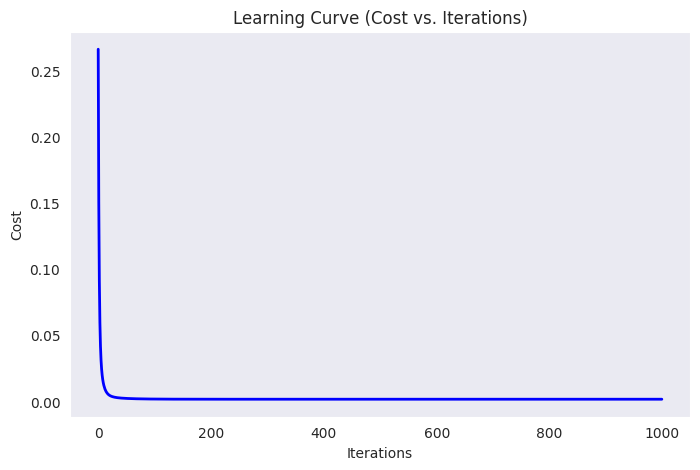

In [412]:
plot_learning_curve(cost_history)

Primay model
1. KNN regressor.  2.Support Vector Regressor


In [413]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred = knn_regressor.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
rmse = np.sqrt(mse_train)
mae = mean_absolute_error(y_train, y_train_pred)
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training R-squared Score: {r2_train}')
print(f'Training Root Mean Squared Error: {rmse}')
print(f'Training Mean Absolute Error: {mae}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Testing Mean Squared Error: {mse}')
r2 = r2_score(y_test, y_pred)
print(f' Testing R-squared Score: {r2}')
rmse = np.sqrt(mse)
print(f'Testing Root Mean Squared Error: {rmse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'Testing Mean Absolute Error: {mae}')


Training Mean Squared Error: 0.06140350877192982
Training R-squared Score: 0.7543103448275862
Training Root Mean Squared Error: 0.24779731389167603
Training Mean Absolute Error: 0.06140350877192982
Testing Mean Squared Error: 0.0606896551724138
 Testing R-squared Score: 0.7546153846153846
Testing Root Mean Squared Error: 0.2463527048205759
Testing Mean Absolute Error: 0.13793103448275862


Model-2

In [414]:
# Train SVR model
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Predictions on training and test sets
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Evaluate Performance on Training Set
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("\nTraining Set Performance:")
print("Training R^2 Score:", train_r2)
print("Training Mean Squared Error (MSE):", train_mse)
print("Training Root Mean Squared Error (RMSE):", train_rmse)
print("Training Mean Absolute Error (MAE):", train_mae)

# Evaluate Performance on Test Set
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\nTest Set Performance:")
print("Test R^2 Score:", test_r2)
print("Test Mean Squared Error (MSE):", test_mse)
print("Test Root Mean Squared Error (RMSE):", test_rmse)
print("Test Mean Absolute Error (MAE):", test_mae)


Training Set Performance:
Training R^2 Score: 0.8854637100884755
Training Mean Squared Error (MSE): 0.028625259282289282
Training Root Mean Squared Error (RMSE): 0.1691900094044837
Training Mean Absolute Error (MAE): 0.11176336144378961

Test Set Performance:
Test R^2 Score: 0.7449097464195671
Test Mean Squared Error (MSE): 0.06309009838850184
Test Root Mean Squared Error (RMSE): 0.2511774241218781
Test Mean Absolute Error (MAE): 0.19775569456716455


Hyperparameter tunning

Model-1

In [415]:
# Create a KNN Regressor model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'leaf_size': [10, 20, 30]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Get the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}


In [416]:
# Updated parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 500, 1000],  # Added higher values for C
    'epsilon': [0.01, 0.05, 0.1, 0.5, 1],  # Finer range for epsilon
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Finer values for gamma
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernels to test
}

# Initialize SVR model
svr = SVR()

# Perform RandomizedSearchCV with updated parameters
grid_search = RandomizedSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2, n_iter=50)
grid_search.fit(X_train, y_train)

# Best Parameters & Model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.05, 'C': 1}


Feature Selection

In [ ]:

# Initialize base model for RFE (Linear Regression)
rfe_model = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rfe_model, n_features_to_select=4)  # Select top 4 features
rfe.fit(X, y)

# Get rankings of features
feature_ranking = rfe.ranking_
selected_features = X.columns[rfe.support_]


# Plot feature importance ranking
plt.figure(figsize=(10, 5))
sns.barplot(x=X.columns, y=feature_ranking, palette="viridis")
plt.xlabel("Features")
plt.ylabel("Ranking (Lower is Better)")
plt.title("Feature Selection using RFE")
plt.xticks(rotation=90)
plt.show()



In [ ]:
feature_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})

# Sort the features based on their ranking
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')
feature_ranking_df

In [ ]:
selected_features

Model-2

In [ ]:
# Initialize SelectKBest with mutual_info_regression for regression task
k_best = SelectKBest(score_func=mutual_info_regression, k=4)  # Select top 4 features
k_best.fit(X, y)

# Get selected feature indices
selected_feature_indices = np.where(k_best.get_support())[0]

# Get feature names (replace 'X.columns' with your column names)
feature_names = X.columns  # Or use the appropriate column names from your data

# Get feature scores
feature_scores = k_best.scores_

# Sort features based on scores in descending order
sorted_indices = np.argsort(feature_scores)[::-1]
sorted_feature_scores = feature_scores[sorted_indices]

# Get sorted feature names based on their scores
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Print sorted feature scores and names
print("Sorted Feature Scores:")
for i, score in enumerate(sorted_feature_scores):
    print(f"{sorted_feature_names[i]}: {score}")

# Print selected features
print("\nSelected Features (Top 4):")
selected_features = [feature_names[i] for i in selected_feature_indices]
print(selected_features)

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_names, y=sorted_feature_scores, palette="coolwarm")
plt.title("Feature Importance Based on Mutual Information (Top Features)")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=90)
plt.show()

Final Model

In [423]:
X = World_Happiness_Report[['log_gdp_per_capita','social_support','freedom_to_make_life_choices', 'dystopia_residual']]
y = World_Happiness_Report['ladder_score']
final_model_reg = SVR(C=0.1, epsilon=0.01, gamma='scale', kernel='rbf')
final_model_reg.fit(X_train, y_train)
y_pred_train = final_model_reg.predict(X_train)
y_pred_test = final_model_reg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'Training R-squared Score: {r2_train}')
print(f'Training Mean Squared Error: {mse_train}')
print(f'Training Root Mean Squared Error: {rmse_train}')
print(f'Training Mean Absolute Error: {mae_train}')
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f'Test R-squared Score: {r2_test}')
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test Root Mean Squared Error: {rmse_test}')
print(f'Test Mean Absolute Error: {mae_test}')


Training R-squared Score: 0.8122594433837609
Training Mean Squared Error: 0.046920693127850466
Training Root Mean Squared Error: 0.2166118490015042
Training Mean Absolute Error: 0.14169723424406497
Test R-squared Score: 0.8005849799066913
Test Mean Squared Error: 0.04932024278169823
Test Root Mean Squared Error: 0.2220816128852144
Test Mean Absolute Error: 0.16708957452470624


Conclusion